# Time Series Stationarity

## What is Stationarity?

A time series is stationary if it does not exhibit any long term trends or obvious seasonality. 

It has:

- A constant variance through time
- A constant mean through time
- The statistical properties of the time series do not change

## Visualise Data

(Data sourced from [Kaggle](https://www.kaggle.com/datasets/ashfakyeafi/air-passenger-data-for-time-series-analysis) with a CC0 licence)

In [30]:
# Import packages
import plotly.express as px
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import kagglehub

In [31]:
# Read in the data
# Download latest version
path = kagglehub.dataset_download("ashfakyeafi/air-passenger-data-for-time-series-analysis")

data = pd.read_csv(path + "/AirPassengers.csv")

In [32]:

import matplotlib.pyplot as plt

def plotting(title, data, x, y, x_label, y_label):
    """General function to plot the passenger data (Matplotlib version)."""
    data[x] = pd.to_datetime(data['Month'])
    plt.figure(figsize=(6, 4))
    plt.plot(data[x], data[y])
    plt.title(title)

    #plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()


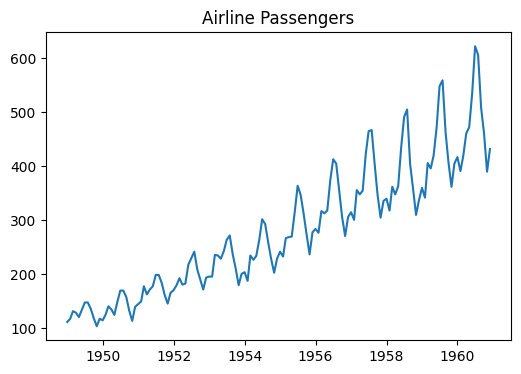

In [33]:
# Plot the airline passenger data
plotting(title='Airline Passengers', data=data, x='Month',
         y='#Passengers', x_label='Date', y_label='Passengers')

Is this time series stationary? No.

There is a clear increasing trend and the variance of fluctuations are also increasing in time.

To make the time series stationary, we need apply transformations to it.

## Differencing

The most common transformation is differencing.

$$
d_t = y_t - y_{t-1}
$$

Where d(t) is the difference at time t between the series at points y(t) and y(t-1).


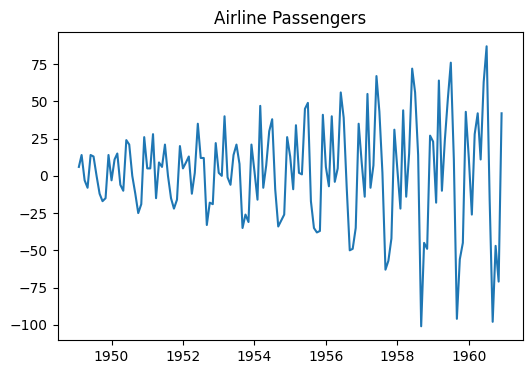

In [34]:
# Take the difference and plot it
data["Passenger_Diff"] = data["#Passengers"].diff()

plotting(title='Airline Passengers', data=data, x='Month', y='Passenger_Diff',
         x_label='Date', y_label='Passengers<br>Difference Transform')

Is the data now stationary? No.

The mean is now constant and is oscillating about zero. However, we can clearly see the variance is still increasing through time.

## Logarithm Transform

To stabilise the variance, we apply the natural log transform.

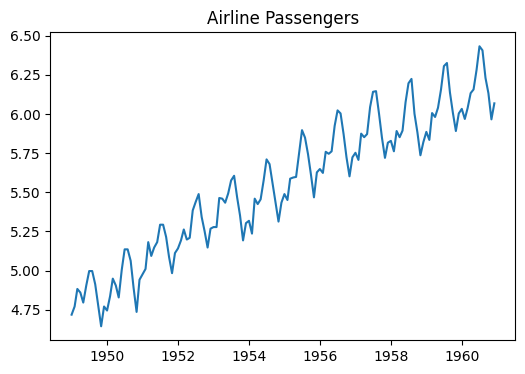

In [35]:
# Take the log and plot it
data["Passenger_Log"] = np.log(data["#Passengers"])

plotting(title='Airline Passengers', data=data, x='Month',
         y='Passenger_Log', x_label='Date', y_label='Passenger<br>Log Transform')

The fluctuations are now on a consistent scale, but there is still a trend. Therefore, we now again have to apply the difference transform.

## Logarithm and Difference Transform

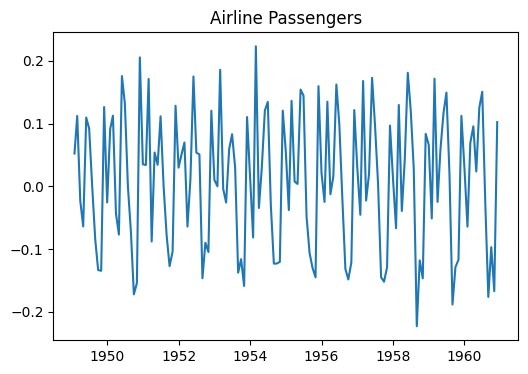

In [36]:
# Take the difference and log and plot it
data["Passenger_Diff_Log"] = data["Passenger_Log"].diff()

plotting(title='Airline Passengers', data=data, x='Month',
         y='Passenger_Diff_Log', x_label='Date', y_label='Passenger<br>Log and Difference')

Is the data now stationary? Yes!

As we can see, the mean and variance is now constant and has no long term trend.

## Stationarity Test

There are more quantitative techniques to determine if the data is indeed stationary.

One such method is the Augmented Dickey-Fuller (ADF) test. This is a statistical hypothesis test where the null hypothesis is the series is non-stationary (also known as a unit root test).

In [37]:
# ADF test
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))


adf_test(data["Passenger_Diff_Log"][1:])

ADF Statistic:  -2.7171305983881098
P-Value:  0.07112054815086265
Critical Values:
	1%: -3.48
	5%: -2.88
	10%: -2.58


The ADF P-value (7.1%) is in-between the 5% and 10%, so depending on where you set your significance level we either reject or fail to reject the null hypothesis.